In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics         import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression
from sklearn.tree            import DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import GaussianNB
from sklearn.svm             import SVC
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import classification_report

In [2]:
train = pd.read_csv(r"C:\Users\Elkady\Conda_project\titanic train.csv")
test = pd.read_csv(r"C:\Users\Elkady\Conda_project\titanic test.csv")

# Exploring Data

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
nul = train.isnull().sum()
nul[nul>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<Axes: >

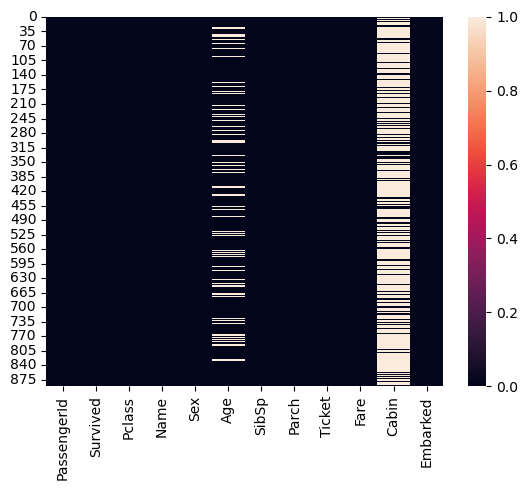

In [8]:
sns.heatmap(train.isnull())


# Clean Data

In [9]:
def clean (d):
    d.drop(['Cabin','Ticket','Name','Embarked'],axis=1,inplace=True)
    d.Age = train.Age.fillna(d.Age.median())
    d.dropna()
    return d

In [10]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,22.0,0,0,7.8292
1,893,3,female,38.0,1,0,7.0000
2,894,2,male,26.0,0,0,9.6875
3,895,3,male,35.0,0,0,8.6625
4,896,3,female,35.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500
414,1306,1,female,44.0,0,0,108.9000
415,1307,3,male,27.0,0,0,7.2500
416,1308,3,male,34.0,0,0,8.0500


In [11]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000
887,888,1,1,female,19.0,0,0,30.0000
888,889,0,3,female,28.0,1,2,23.4500
889,890,1,1,male,26.0,0,0,30.0000


<Axes: >

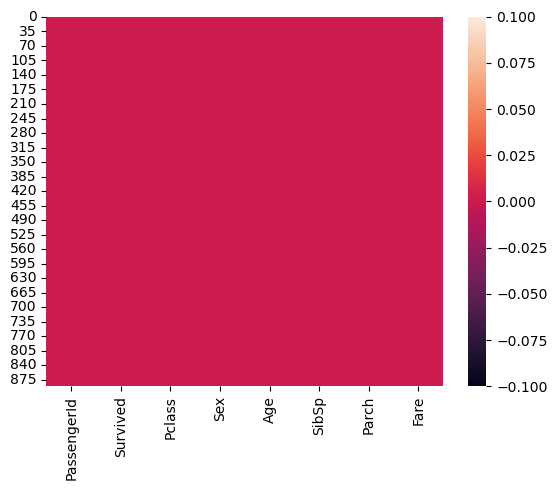

In [12]:
sns.heatmap(train.isnull())

C:\Users\Elkady\AppData\Local\Temp\ipykernel_10808\1921203086.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


<Axes: >

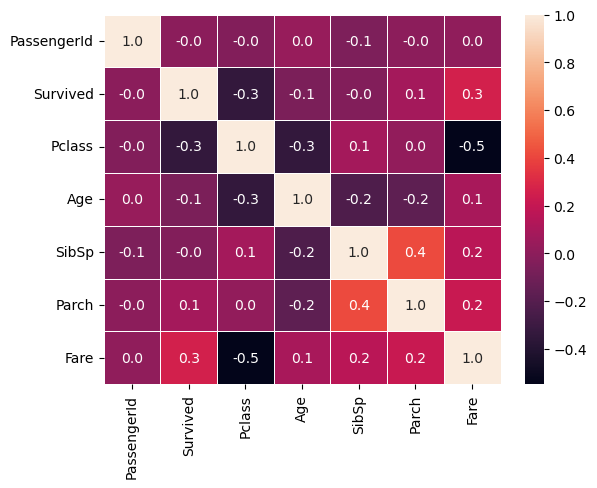

In [13]:
cor = train.corr()
sns.heatmap(cor,annot=True,fmt='.1f',linewidth=.5)

In [14]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

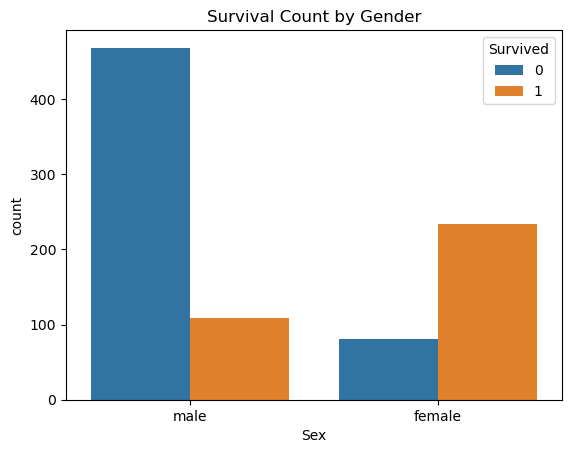

In [16]:
sns.countplot(data=train, x='Sex', hue='Survived')

# Add labels and a title
plt.title('Survival Count by Gender')

# Show the plot
plt.show()

<Axes: xlabel='Pclass', ylabel='count'>

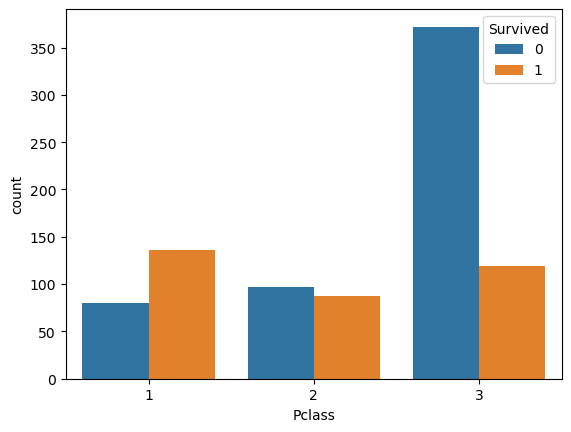

In [17]:
sns.countplot(data=train, x='Pclass',hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

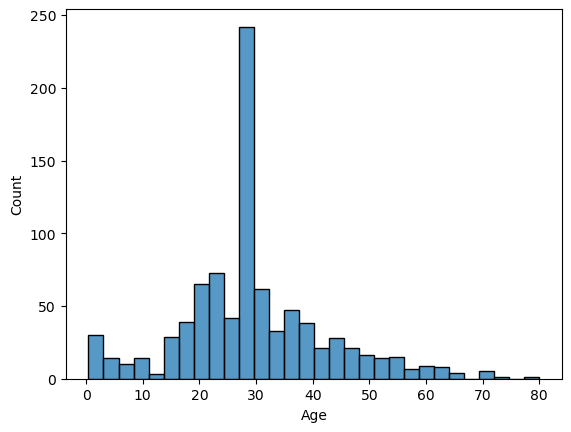

In [18]:
sns.histplot(train.Age)

# Transform Data

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [20]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
def label_enoder (df,column):
    if df[column].dtype == 'object':
        df[column] = lab.fit_transform(df[column])
for column in train.columns:
    label_enoder(train,column)
for column in test.columns:
    label_enoder(test,column)
    

In [21]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int32(1), int64(5)
memory usage: 52.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int32  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch       

# Modelling 

In [22]:
x = train.drop(['Survived'],axis=1)
y = train.Survived

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=42)

In [24]:
MODELS = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),
          SVC(),RandomForestClassifier()
          ,GradientBoostingClassifier()
          ]

In [25]:
confusion = []
classification =[]
accuracies =[]
def evaluate_models (MODELS,xtrain,ytrain,xtest,ytest):
    for model in MODELS:
        model.fit(xtrain,ytrain)
        predict = model.predict(xtest)
        print (f"model:{type(model).__name__}")
        print (confusion_matrix(ytest,predict))
        print (classification_report(ytest,predict))
        confusion.append(confusion_matrix(ytest, predict))
        classification.append(classification_report(ytest,predict))
        # Calculate accuracy and append it to the accuracies list
        accuracy = accuracy_score(ytest, predict)
        accuracies.append(accuracy)
        print(f"Accuracy: {accuracy:.2f}")
        print ('\n')


In [26]:
evaluate_models(MODELS,xtrain,ytrain,xtest,ytest)

C:\Users\Elkady\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model:LogisticRegression
[[89 16]
 [24 50]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.68      0.71        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179

Accuracy: 0.78


model:DecisionTreeClassifier
[[86 19]
 [27 47]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       105
           1       0.71      0.64      0.67        74

    accuracy                           0.74       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.74      0.74      0.74       179

Accuracy: 0.74


model:KNeighborsClassifier
[[88 17]
 [44 30]]
              precision    recall  f1-score   support

           0       0.67      0.84      0.74       105
           1       0.64      0.41      0.50        74

    accura

In [27]:
maccu = pd.DataFrame({'Algorithm':MODELS,'accuracy':accuracies})
model_accuracy = maccu.sort_values(by='accuracy',ascending=False,ignore_index=True)
model_accuracy

,Algorithm,accuracy
0,([DecisionTreeRegressor(criterion='friedman_ms...,0.804469
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.798883
2,LogisticRegression(),0.776536
3,GaussianNB(),0.770950
4,DecisionTreeClassifier(),0.743017
5,KNeighborsClassifier(),0.659218
6,SVC(),0.597765


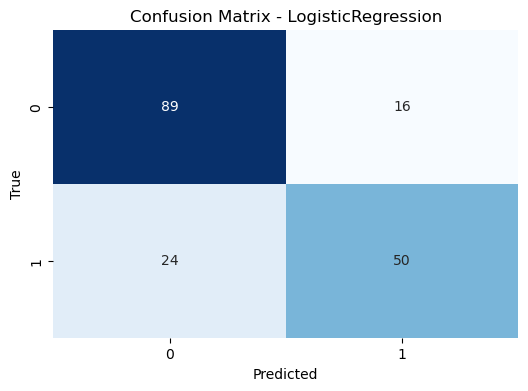

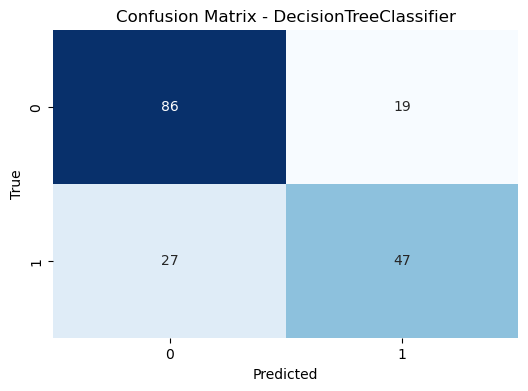

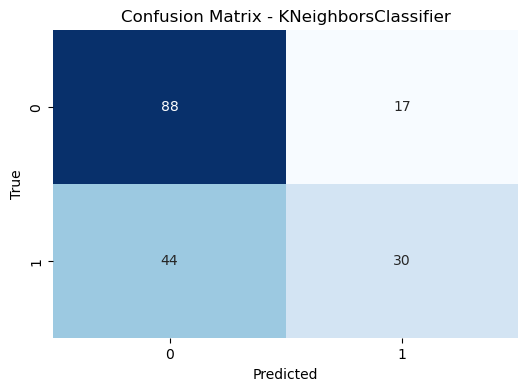

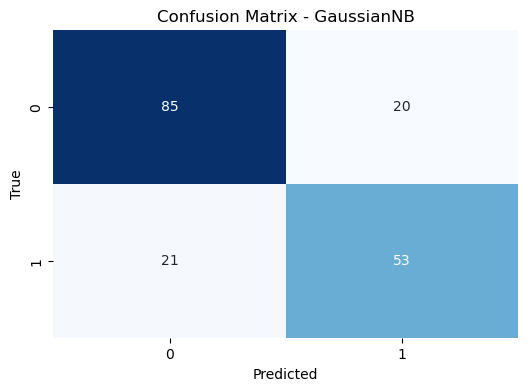

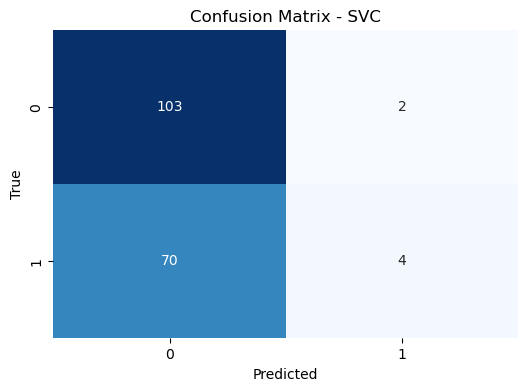

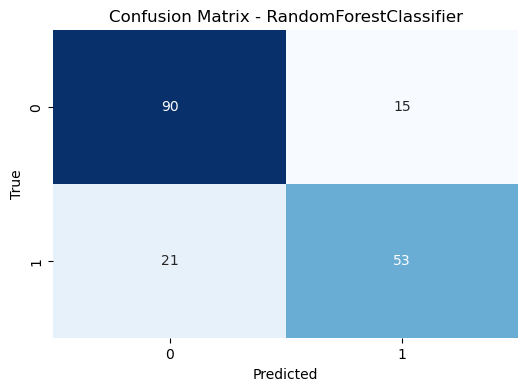

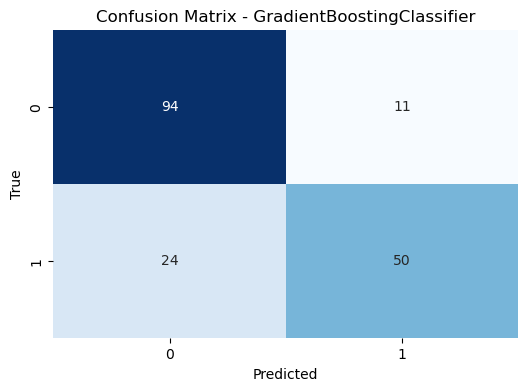

In [28]:
for i, model in enumerate(MODELS):
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {type(model).__name__}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


In [29]:
modelx = DecisionTreeClassifier()
modelx.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [30]:
lpredict = modelx.predict(test)

In [40]:
final = test.PassengerId.astype(str)
final.info()

<class 'pandas.core.series.Series'>
RangeIndex: 418 entries, 0 to 417
Series name: PassengerId
Non-Null Count  Dtype 
--------------  ----- 
418 non-null    object
dtypes: object(1)
memory usage: 3.4+ KB


In [41]:
pri_df = pd.DataFrame({'PassengerId':final,'Transported':lpredict})
type(final)

pandas.core.series.Series

In [38]:
pri_df.to_csv('Titanic_Submission.csv',index=False)